## EDA

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
mbti = pd.read_csv('data/train.csv')

# List of mbti types 
type_labels = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 
               'ISTP', 'ISFP', 'INFP', 'INTP', 
               'ESTP', 'ESFP', 'ENFP', 'ENTP', 
               'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']

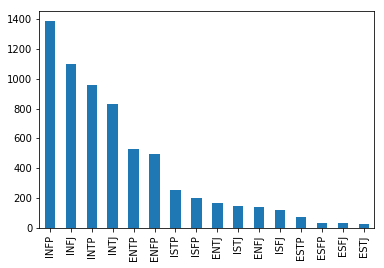

In [167]:
mbti['type'].value_counts().plot(kind = 'bar')


Lets increase the size of the dataset by converting each of the 50 posts into the `posts` column into its own row.

In [168]:

all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [169]:
print(f"before:  {mbti.shape} \nafter: {all_mbti.shape}")

before:  (6506, 2) 
after: (316548, 2)


In [7]:
pd.concat([mbti['type'].value_counts().to_frame(name='before'), all_mbti['type'].value_counts().to_frame(name='after')],axis=1)

before  after
ENFJ     143   6947
ENFP     496  23925
ENTJ     167   8174
ENTP     530  26017
ESFJ      35   1668
ESFP      36   1663
ESTJ      30   1495
ESTP      71   3437
INFJ    1100  53807
INFP    1386  67846
INTJ     830  39776
INTP     960  46637
ISFJ     124   6051
ISFP     198   9521
ISTJ     145   7018
ISTP     255  12566

In [8]:
all_mbti.head()

type                                               post
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2  INFJ  enfp and intj moments  https://www.youtube.com...
3  INFJ  What has been the most life-changing experienc...
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...

### Note: find out sampling with replacement

---

---
## create features


 feature | regex
 ---|---
 `?`   | `r"(\?)"`
 `!`   | `r"(!)"`
 `...` | `r"(\.\.\.)"`
 youtube | ?part of social media
 www | `r"(www)"`
 jpg/jpeg/gif | <code>r"(jpe?g&#124;gif)"</code>
 emoji `;), :tongue:, :smile: #hastags?` | `r":[a-z]*:"`
 word count   | (\w+) / 50 (length per post sample)
 word_length > 5   | `r"(\w{5,})"`
 social_media (instagram, snapchat, etc)  | [social_medai]
 ALL_CAPS  | `r"(\b[A-Z]{2,}\b)"`


In [14]:
import re

In [15]:
# count question marks
def qm_count(string):
    q_mark = re.compile(r'(\?)')
    return len(re.findall(q_mark, string))
    

In [17]:
def exclaim_count(string):
    ex_mark = re.compile(r'(\!)')
    return len(re.findall(ex_mark, string))

In [19]:
def elipse_count(string):
    elipse = re.compile(r"(\.\.\.)")
    return len(re.findall(elipse, string))

In [21]:
def emoji_count(string):
    emojis = re.compile(r"(:[a-z]*:)|([:;][()pdo03])",re.I)
    return len(re.findall(emojis,string))

In [34]:
def word_count(string):
    words = re.compile(r"(\w+)")
    count = len(re.findall(words, string))
    return count

In [36]:
def word_len(string):
    len5 = re.compile(r"\w{5,}")
    return len(re.findall(len5,string))

In [29]:
def all_caps(string):
    mbti_type = set(all_mbti.type) # set of all mbti types
    capsloc = re.compile(r"\b[A-Z]{2,}\b")
    caps_words = [x for x in re.findall(capsloc,string) if x not in mbti_type]
    return len(caps_words)

In [31]:
def count_pix(string):
    pix = re.compile(r"\b(jpe?g|gif|png|img)\b",re.I)
    return len(re.findall(pix, string))

either leave all above functions as is (easier to test)

or put it all in one function with flags to call each one

In [41]:
def create_features(df):
    df['questions'] = df['post'].apply(qm_count)
    df['exclaimed'] = df['post'].apply(exclaim_count)
    df['elipses'] = df['post'].apply(elipse_count)
    df['emojis'] = df['post'].apply(emoji_count)
    df['word_count'] = df['post'].apply(word_count)
    df['big_words'] = df['post'].apply(word_len)
    df['images'] = df['post'].apply(count_pix)    
    df['words_all_caps'] = df['post'].apply(all_caps) 

In [42]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # ignore warning messages cluttering up view
    create_features(all_mbti)

In [43]:
all_mbti.head(10)

type                                               post  questions  \
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw          1   
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...          0   
2  INFJ  enfp and intj moments  https://www.youtube.com...          2   
3  INFJ  What has been the most life-changing experienc...          1   
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...          2   
5  INFJ               May the PerC Experience immerse you.          0   
6  INFJ  The last thing my INFJ friend posted on his fa...          0   
7  INFJ  Hello ENFJ7. Sorry to hear of your distress. I...          0   
8  INFJ  84389  84390  http://wallpaperpassion.com/uplo...          0   
9  INFJ                                 Welcome and stuff.          0   

   exclaimed  elipses  emojis  word_count  big_words  images  words_all_caps  
0          0        0       0           7          3       0               0  
1          0        0       0           7          3       1               0  
2          0        0       0          24         12       0               0  
3          0        0       0          11          2       0               0  
4          0        0       0          20          8       0               0  
5          0        0       0           6          2       0               0  
6          0        0       0          23         10       0               0  
7          0        1       0          38         14       0               0  
8          0        1       0          26         13       2               0  
9          0        0       0           3          2       0               0

In [45]:
# save as it took MEGA long
all_mbti.to_csv('data/all_mbti_feat.csv')

---

In [170]:
all_mbti= pd.read_csv('data/all_mbti_feat.csv').drop('Unnamed: 0', axis=1)
all_mbti.head()

type                                               post  questions  \
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw          1   
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...          0   
2  INFJ  enfp and intj moments  https://www.youtube.com...          2   
3  INFJ  What has been the most life-changing experienc...          1   
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...          2   

   exclaimed  elipses  emojis  word_count  big_words  images  words_all_caps  
0          0        0       0           7          3       0               0  
1          0        0       0           7          3       1               0  
2          0        0       0          24         12       0               0  
3          0        0       0          11          2       0               0  
4          0        0       0          20          8       0               0

In [171]:
def split_type(row):
    ''' 
       Split MBTI type into individual features for Binary Classification
       eg ENFP = [0 1 0 0]
    '''
    t = row['type']
    I,N,T,J = 0,0,0,0
    
    I = 1 if t[0] =='I' else 0
    
    N = 1 if t[1] == 'N' else 0
    
    T = 1 if t[2] == 'T' else 0
    
    J = 1 if t[3] == 'J' else 0
    
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [172]:
all_mbti = all_mbti.join(all_mbti.apply(lambda row: split_type(row), axis=1))
all_mbti.head(5)

type                                               post  questions  \
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw          1   
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...          0   
2  INFJ  enfp and intj moments  https://www.youtube.com...          2   
3  INFJ  What has been the most life-changing experienc...          1   
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...          2   

   exclaimed  elipses  emojis  word_count  big_words  images  words_all_caps  \
0          0        0       0           7          3       0               0   
1          0        0       0           7          3       1               0   
2          0        0       0          24         12       0               0   
3          0        0       0          11          2       0               0   
4          0        0       0          20          8       0               0   

   IE  JP  NS  TF  
0   1   1   1   0  
1   1   1   1   0  
2   1   1   1   0  
3   1   1   1   0  
4   1   1   1   0

### FeatureUnion to add created features to the data pipeline

https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments/code

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html

#### my own stopwords list

In [173]:
my_stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
"aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't",
'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't",
'have', 'haven', "haven't", 'having',  'how', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its',
'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'needn',
"needn't", 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't",
'she', "she's", 'should', "should've",'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'then',
'there', 'these', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',
'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't",
'wouldn', "wouldn't", 'y','ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP', 'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ',
'ESFJ', 'ENFJ', 'ENTJ']

In [215]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import FeatureUnion

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import MinMaxScaler

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [58]:
# function to select all numeric data (created features) to be used in pipeline
get_numeric_data = FunctionTransformer(lambda df: df.iloc[:,2:], validate=False) # we will validate
get_text_data    = FunctionTransformer(lambda df: df.iloc[:,1], validate=False) # we will validate

In [175]:
def get_numeric_data(X):
    return X.iloc[:,2:]

In [176]:
def get_text_data(X):
    return X.iloc[:,1]

In [76]:
all_mbti.columns

Index(['type', 'post', 'questions', 'exclaimed', 'elipses', 'emojis',
       'word_count', 'big_words', 'images', 'words_all_caps'],
      dtype='object')

In [227]:
from sklearn.base import TransformerMixin, BaseEstimator

In [287]:
class get_numeric_col(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        num_cols = X[self.cols].values.reshape(-1, 1)
        return num_cols

In [263]:
class get_text_col(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        text_col = X[self.cols]
        return text_col

In [264]:
num_cols = ['questions', 'exclaimed', 'elipses', 'emojis',
       'word_count', 'big_words', 'images', 'words_all_caps']

In [265]:
text_col = ['post']

In [288]:
numeric_pipeline  = Pipeline([('num_data', get_numeric_col(num_cols)),
                              ('scaler', MinMaxScaler()),
                             ])

In [289]:
text_pipeline = Pipeline([('text_data', get_text_col(text_col)),
                          ('count_vec', CountVectorizer())
                         ])

In [290]:
union = Pipeline([
         ('numeric', numeric_pipeline),
         #('num_data', get_numeric_col(num_cols)),
         ('text',text_pipeline)])

In [291]:
main_pipe = Pipeline([
    ('feature', union),
    ('bayes', MultinomialNB())
])

In [241]:
all_mbti.head()

type                                               post  questions  \
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw          1   
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...          0   
2  INFJ  enfp and intj moments  https://www.youtube.com...          2   
3  INFJ  What has been the most life-changing experienc...          1   
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...          2   

   exclaimed  elipses  emojis  word_count  big_words  images  words_all_caps  \
0          0        0       0           7          3       0               0   
1          0        0       0           7          3       1               0   
2          0        0       0          24         12       0               0   
3          0        0       0          11          2       0               0   
4          0        0       0          20          8       0               0   

   IE  JP  NS  TF  
0   1   1   1   0  
1   1   1   1   0  
2   1   1   1   0  
3   1   1   1   0  
4   1   1   1   0

In [242]:
from sklearn.model_selection import train_test_split

In [292]:
X_train, X_test, y_train, y_test = train_test_split(all_mbti.iloc[:,1:], all_mbti['IE'], test_size=0.3, 
                                                    random_state=42)


In [244]:
X_train.head()

post  questions  \
88298   This one inspires me the same way my INFJ frie...          1   
80402   I think that's probably what he's doing, being...          0   
175838  I wonder if there is a correlation between NT ...          0   
4744    @OrangeAppled   “I certainly adapted to their ...          1   
279913  Imaginary Numb3r I do like you're description....          0   

        exclaimed  elipses  emojis  word_count  big_words  images  \
88298           0        0       0          20          6       0   
80402           0        1       0          39         13       0   
175838          0        1       0          35         13       0   
4744            0        1       0          32         15       0   
279913          0        1       0          39         12       0   

        words_all_caps  IE  JP  NS  TF  
88298                0   1   1   0   1  
80402                0   1   0   1   1  
175838               1   1   0   1   1  
4744                 0   1   1   1   1  
279913               0   1   0   1   1

In [293]:
main_pipe.fit(X_train, y_train)

/Users/wahe3bru/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [224]:
y_pred= main_pipe.predict(X_test)

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [211]:
main_pipe.score(X_train,y_train)

0.76497745765695024

In [146]:
numeric_pipeline2.score(X_test,y_test)

0.21353130100563367

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00      2155
       ENFP       0.66      0.01      0.02      7282
       ENTJ       0.00      0.00      0.00      2449
       ENTP       0.49      0.02      0.03      7831
       ESFJ       0.00      0.00      0.00       464
       ESFP       0.00      0.00      0.00       493
       ESTJ       0.00      0.00      0.00       458
       ESTP       0.00      0.00      0.00      1041
       INFJ       0.26      0.24      0.25     16233
       INFP       0.24      0.86      0.38     20278
       INTJ       0.41      0.07      0.11     11856
       INTP       0.35      0.13      0.19     13981
       ISFJ       0.33      0.00      0.00      1798
       ISFP       1.00      0.00      0.00      2825
       ISTJ       1.00      0.00      0.00      2123
       ISTP       0.71      0.00      0.00      3698

avg / total       0.38      0.25      0.17     94965



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
from sklearn.metrics import confusion_matrix

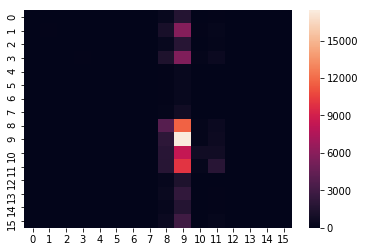

In [97]:
import seaborn as sns
%matplotlib inline
sns.heatmap(confusion_matrix(y_test,y_pred))

---
## Sklearn pipeline, GridSearchCV
```
imports

steps= [('count_vec','CountVectorizer()),
        ('SVM', SVM())]
       
pipeline= Pipeline(steps)

parameters = {'SVM__C': [1,10,100],
              'SVM__gamma': [0.1,0.01]}
              
train, test split

cv = GrisSearchCV(pipeline,parameters) #default cv=5

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

"best params" cv.best_params_

"Accuracy" cv.score(X_test,y_test)

classification_report(y_test,y_pred)
```

---